In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [8]:
# Read the X from the csv file
dataFrame = pd.read_csv('./dataGenerator/nonLinearSeperableData.csv', header=None)
dataFrame.columns = ['x1', 'x2', 'y']
print(dataFrame.head())

# convert the dataFrame to numpy array
X = np.array(dataFrame[['x1', 'x2']])
ones_column = np.ones((X.shape[0], 1))
X_with_ones = np.hstack((X, ones_column))
X = X_with_ones
Y = np.array(dataFrame['y'])

          x1         x2  y
0  24.859096  21.564275  0
1 -15.759268   5.591729  0
2  66.710642 -26.610435  0
3  90.393772 -50.464119  0
4   6.756713  32.964487  0


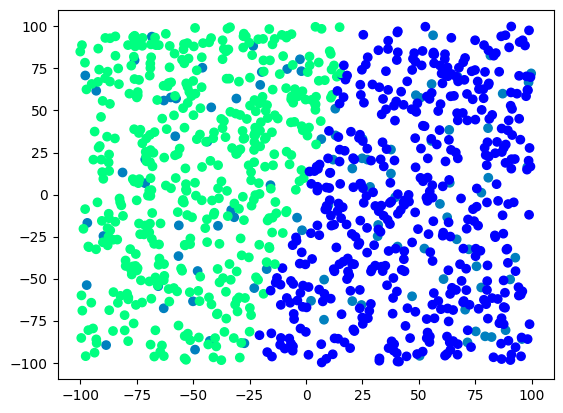

In [9]:
# ploting the X
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

In [10]:
# Perceptron Learning Algorithm (PLA) for Linear Seperable X

numFeatures = 2
weights = np.zeros(numFeatures+1)
learningRate = 0.2
print("Dimension of weights: ", weights.shape)
print("Dimension of X[0]: ", X.shape)
print("Dimension of Y[0]: ", Y.shape)
done = False
maxIterations = 1000
error = []

while not done and maxIterations > 0:
    done = True
    err = 0
    for i in range(len(X)):
        y_pred = np.sign(np.dot(X[i], weights))
        if y_pred != Y[i]:
            weights += learningRate*(Y[i]-y_pred) * X[i]
            done = False
            err += 1
    error.append(err/len(X))

    maxIterations -= 1

print("Weights: ", weights)
print("Error: ", error)

Dimension of weights:  (3,)
Dimension of X[0]:  (1000, 3)
Dimension of Y[0]:  (1000,)
Weights:  [-103.68979174   17.46787544  -26.2       ]
Error:  [0.021, 0.133, 0.127, 0.129, 0.122, 0.119, 0.129, 0.137, 0.126, 0.122, 0.132, 0.128, 0.121, 0.124, 0.121, 0.128, 0.126, 0.126, 0.129, 0.119, 0.126, 0.136, 0.126, 0.122, 0.119, 0.124, 0.12, 0.12, 0.12, 0.118, 0.121, 0.124, 0.119, 0.102, 0.126, 0.13, 0.121, 0.128, 0.126, 0.126, 0.133, 0.134, 0.129, 0.131, 0.135, 0.12, 0.128, 0.136, 0.122, 0.135, 0.118, 0.128, 0.123, 0.128, 0.126, 0.118, 0.119, 0.132, 0.129, 0.119, 0.119, 0.124, 0.119, 0.125, 0.12, 0.121, 0.128, 0.129, 0.124, 0.128, 0.129, 0.134, 0.119, 0.117, 0.117, 0.132, 0.126, 0.118, 0.122, 0.122, 0.118, 0.132, 0.127, 0.129, 0.127, 0.118, 0.128, 0.122, 0.12, 0.122, 0.132, 0.13, 0.128, 0.124, 0.125, 0.121, 0.123, 0.132, 0.126, 0.12, 0.124, 0.129, 0.119, 0.124, 0.118, 0.115, 0.12, 0.118, 0.136, 0.13, 0.126, 0.128, 0.128, 0.131, 0.128, 0.134, 0.119, 0.133, 0.135, 0.134, 0.119, 0.125, 0.133, 0

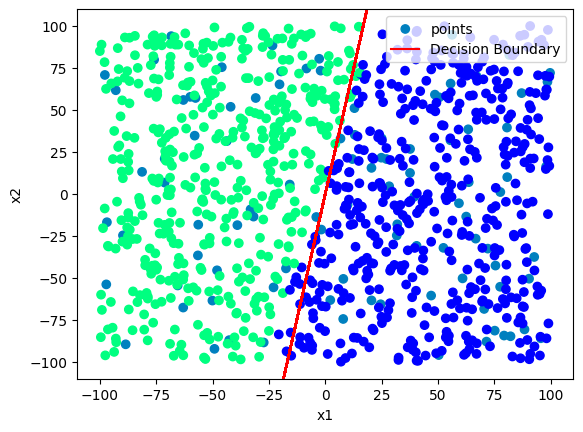

In [11]:
# plot data with linear seperator using weights
y_pred = []
for i in range(len(X)):
    y_pred.append(0 if np.sign(np.dot(X[i], weights)) == 1 else 1)

plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.plot(X[:,0], (-weights[0]/weights[1])*X[:,0], 'r-')
plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['points', 'Decision Boundary'])
plt.show()

Text(0.5, 1.0, 'Error Plot')

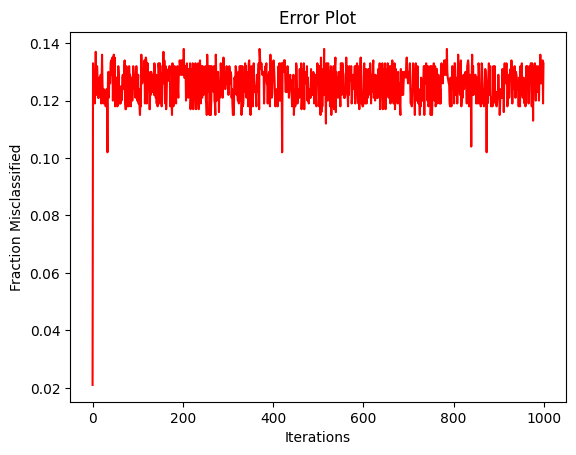

In [12]:
# Error plot for certain number of iterations
plt.plot(range(len(error)), error, 'r-', label='Misclassified')
plt.xlabel('Iterations')
plt.ylabel('Fraction Misclassified')
plt.title('Error Plot')